# Boostrap Zoïberg - Classification d'images

_Tables des matières :_

- [Import](#import-des-données)
- [Visualisations et analyse](#visualisation)
- [Séparation et normalisation](#Preprocessing)
- [Entrainement du modèle](#Entrainement)
- [Evaluation du modèle](#Evaluation)
- [Utilisation avec une image de test](#utilisation)
- [Conclusion](#conclusion)


### Import des données 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import pandas as pd
class Image:
    def __init__(self):
        # Load the dataset
        (self.train_images, self.train_labels), (self.test_images, self.test_labels) = mnist.load_data()
    
    def display_statistics(self):
        # Calculate and display statistics
        fig, ax = plt.subplots()
        unique, counts = np.unique(self.train_labels, return_counts=True)
        ax.bar(unique, counts)
        ax.set_title('Distribution of Digits in Training Data')
        ax.set_xlabel('Digit')
        ax.set_ylabel('Counts')
        plt.show()

    def display_image(self, dataset, index):
        # Display an image
        if dataset == 'train':
            image = self.train_images[index]
        elif dataset == 'test':
            image = self.test_images[index]
        plt.imshow(image, cmap='gray')
        plt.title(f'Image from {dataset} set at index {index}')
        plt.show()

    def display_mean_images(self):
        # Display the mean image of each digit
        fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
        for digit in range(10):
            mean_image = np.mean(self.train_images[self.train_labels == digit], axis=0)
            axes[digit].imshow(mean_image, cmap='gray')
            axes[digit].set_title(f'Digit {digit}')
            axes[digit].axis('off')
        plt.show()

    def reshape_images(self):
        # Reshape the image datasets
        self.train_images = self.train_images.reshape((60000, 784))
        self.test_images = self.test_images.reshape((10000, 784))
        
    def display_sample_table(self, dataset='train', num_samples=10):
        # Display a table of indices and labels
        if dataset == 'train':
            data = self.train_labels
        elif dataset == 'test':
            data = self.test_labels
        indices = np.random.choice(np.arange(len(data)), size=num_samples, replace=False)
        labels = data[indices]
        df = pd.DataFrame({'Index': indices, 'Label': labels})
        display(df)
    def display_digit_counts(self):
        # Calculate counts for each digit in both datasets
        train_counts = np.bincount(self.train_labels)
        test_counts = np.bincount(self.test_labels)
        df = pd.DataFrame({
            'Digits': range(10),
            'Train': train_counts,
            'Test': test_counts
        })
        df.set_index('Digits', inplace=True)
        display(df)

# Usage
data_handler = Image()

2024-05-06 10:05:27.427631: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 10:05:27.467483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Visualisations

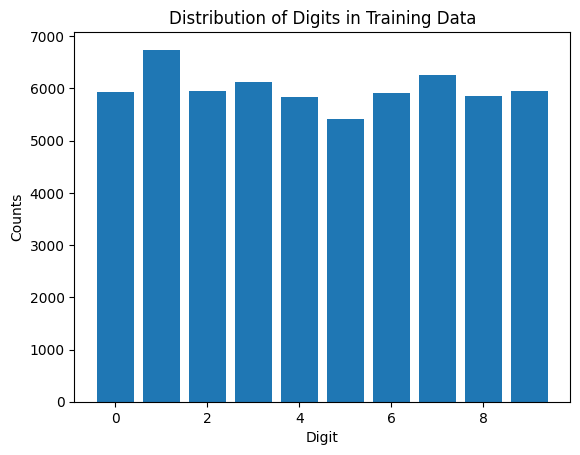

In [3]:
data_handler.display_statistics()

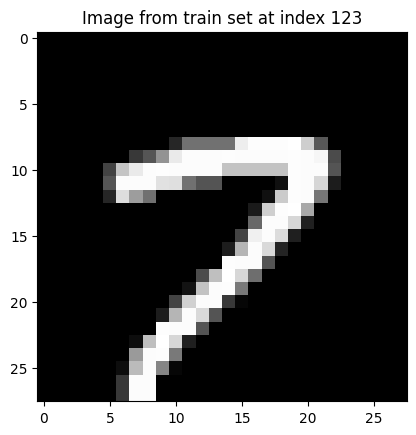

In [4]:
data_handler.display_image('train', 123)  


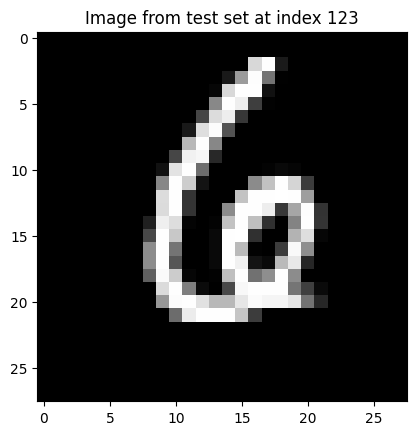

In [5]:
data_handler.display_image('test', 123) 


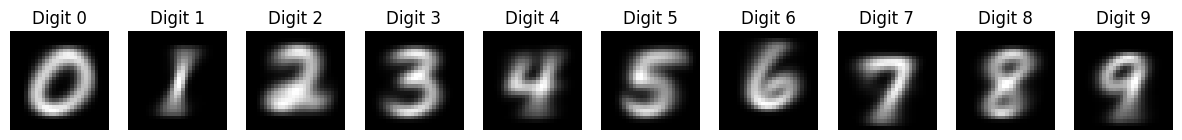

In [6]:
data_handler.display_mean_images()


In [7]:
data_handler.reshape_images()


In [8]:
data_handler.display_sample_table('train', 10) 


,Index,Label
0,13135,0
1,42747,5
2,46168,9
3,2195,0
4,16283,2
5,35677,9
6,11925,9
7,31662,2
8,40126,9
9,12647,1


In [9]:
data_handler.display_digit_counts()


,Train,Test
Digits,,
0,5923,980
1,6742,1135
2,5958,1032
3,6131,1010
4,5842,982
5,5421,892
6,5918,958
7,6265,1028
8,5851,974


## Predictions

### Preprocessing

In [10]:
# Séparation des données:
X_train = data_handler.train_images
X_test = data_handler.test_images
Y_train = data_handler.train_labels
Y_test = data_handler.test_labels

In [11]:
# Normalisation min-max
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

### Entrainement

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  

# Train the classifier
knn.fit(X_train, Y_train)

# Make predictions
Y_pred = knn.predict(X_test)

### Evaluation

In [13]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.05%


### Utilisation 

#### Transformer l'image

In [14]:
import numpy as np
from PIL import Image
def preprocessImage(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert the image to grayscale
    img = img.convert('L')

    # Resize the image to 28x28 pixels
    img = img.resize((28, 28))

    # Convert image data to numpy array
    img_data = np.array(img)

    # Normalize the pixel values
    img_data = img_data.astype('float32') / 255

    # Flatten the image to create a 784-dimensional vector
    img_data = img_data.reshape(1, 784)  # Use reshape(1, -1) if you're unsure about the final dimension
    return img_data


#### Résultat 1

Predicted class: 0


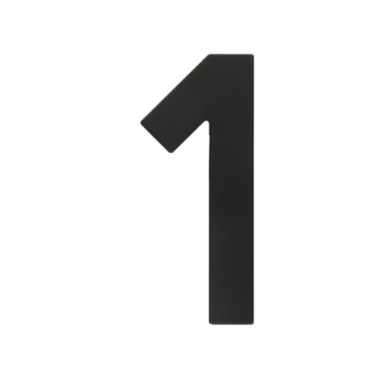

In [15]:
import matplotlib.image as mpimg
img_path = 'test-image.jpg'
img_data = preprocessImage(img_path)
predicted_class = knn.predict(img_data)
print("Predicted class:", predicted_class[0])

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

#### Résultat 2

Predicted class: 1


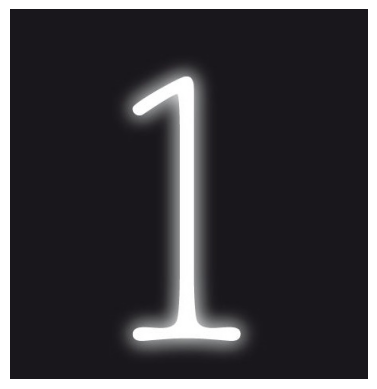

In [16]:
img_path = 'test-image2.jpg'
img_data = preprocessImage(img_path)
predicted_class = knn.predict(img_data)
print("Predicted class:", predicted_class[0])

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

### Conclusion

On peut conclure que le modèle prédit efficacement la classe des images, MNIST, composées de chiffres sur fond noir avec des caractères blancs, mais il ne fonctionne pas aussi bien pour l'inverse, où les chiffres sont noirs sur fond blanc, comme l'indique le résultat 1. Cette situation suggère que notre modèle pourrait être en train de <span style="color: red;">surapprendre (overfitting)</span> les caractéristiques spécifiques des images sur lesquelles il a été entraîné. Pour améliorer la généralisation du modèle, il serait judicieux d'élargir le dataset avec des images variées.

Cependant, pour **des images d'échographie** qui présentent généralement un fond noir, le modèle se montre suffisamment performant, atteignant une efficacité de 97 %. Toutefois, il reste essentiel de continuer à surveiller et ajuster le modèle pour éviter le surapprentissage et garantir sa robustesse sur différentes types d'images.